In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
fear_greed_df = pd.read_csv('fear_greed_index.csv')
historical_df = pd.read_csv('historical_data.csv')

print("Data loaded successfully!")

Data loaded successfully!


In [3]:
# Convert the 'date' column in the sentiment data
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])

# Convert the 'Timestamp IST' in the trading data and extract just the date
# This line takes a string like '02-12-2024 22:50', converts it to a full date and time,
# and then keeps only the date part (2024-12-02).
historical_df['date'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
historical_df['date'] = pd.to_datetime(historical_df['date'])


print("Dates are now in the correct format.")

Dates are now in the correct format.


In [4]:
# Merge the two dataframes on the 'date' column
merged_df = pd.merge(historical_df, fear_greed_df, on='date', how='left')

# Display the first few rows of the new combined table
print("Merged DataFrame:")
print(merged_df.head())

Merged DataFrame:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0    

In [5]:
# Group by the sentiment 'classification' and calculate the sum of 'Closed PnL'
pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].sum().sort_values()

print("Total Profit/Loss by Market Sentiment:")
print(pnl_by_sentiment)

Total Profit/Loss by Market Sentiment:
classification
Extreme Fear     7.391102e+05
Neutral          1.292921e+06
Greed            2.150129e+06
Extreme Greed    2.715171e+06
Fear             3.357155e+06
Name: Closed PnL, dtype: float64



A bar chart 'pnl_by_sentiment.png' has been saved to your folder.


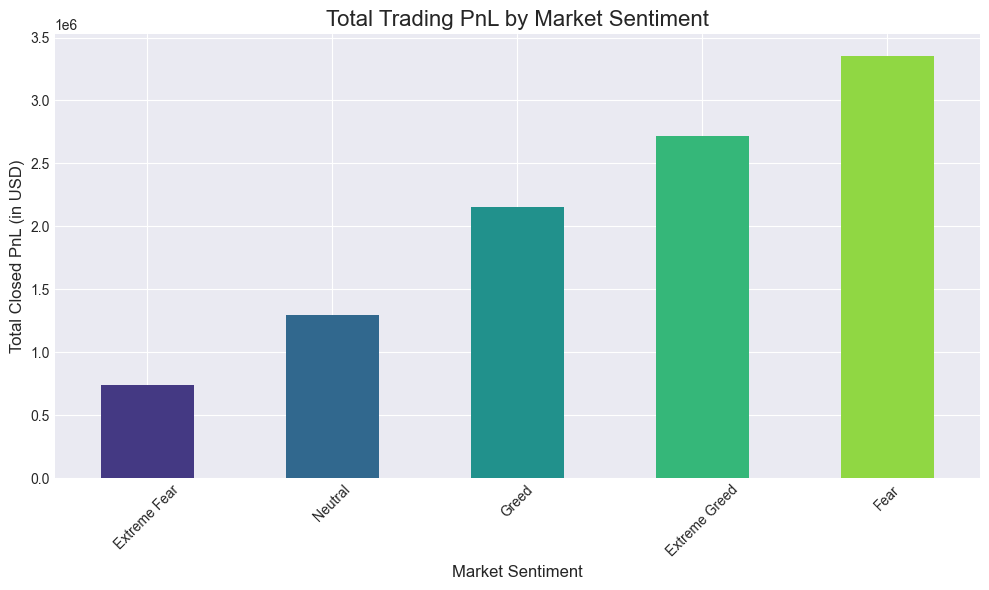

In [6]:
# --- Visualization ---
# Let's create a bar chart to make this easier to see.
plt.style.use('seaborn-v0_8-darkgrid') # Using a nice style for the plot
fig, ax = plt.subplots(figsize=(10, 6))

pnl_by_sentiment.plot(kind='bar', ax=ax, color=sns.color_palette("viridis", len(pnl_by_sentiment)))

ax.set_title('Total Trading PnL by Market Sentiment', fontsize=16)
ax.set_xlabel('Market Sentiment', fontsize=12)
ax.set_ylabel('Total Closed PnL (in USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout() # Adjusts plot to ensure everything fits without overlapping

# Save the plot to a file
plt.savefig('pnl_by_sentiment.png')

print("\nA bar chart 'pnl_by_sentiment.png' has been saved to your folder.")

In [7]:
# 1. Identify profitable trades (PnL > 0)
merged_df['is_profitable'] = merged_df['Closed PnL'] > 0

# 2. Group by sentiment and calculate new metrics
performance_metrics = merged_df.groupby('classification').agg(
    total_trades=('is_profitable', 'count'),
    profitable_trades=('is_profitable', 'sum'),
    avg_pnl_per_trade=('Closed PnL', 'mean')
)

# 3. Calculate the Win Rate in percentage
performance_metrics['win_rate_%'] = (performance_metrics['profitable_trades'] / performance_metrics['total_trades']) * 100

# Clean up the table for a better view
performance_metrics = performance_metrics.drop(columns=['profitable_trades'])
performance_metrics = performance_metrics.round(2) # Round to 2 decimal places

print("Advanced Performance Metrics by Sentiment:")
print(performance_metrics)

Advanced Performance Metrics by Sentiment:
                total_trades  avg_pnl_per_trade  win_rate_%
classification                                             
Extreme Fear           21400              34.54       37.06
Extreme Greed          39992              67.89       46.49
Fear                   61837              54.29       42.08
Greed                  50303              42.74       38.48
Neutral                37686              34.31       39.70
